![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 13 - Bayesian Regression </center>
### <center> Bayesian Optimization </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/13_BayesianRegression/MainGlobalBayesianOptimization_Solution.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Boston data:

In [2]:
from sklearn.datasets import load_boston

mX, vY = load_boston(return_X_y=True)
mX.shape, vY.shape

((506, 13), (506,))

In [3]:
N   = mX.shape[0]
mX -= mX.mean(axis=0)
mX /= mX.std (axis=0)
vY -= vY.mean()
vY /= vY.std ()

#### Bayesian optimization:

In [4]:
from sklearn.gaussian_process         import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

def BayesianOptimization(f, N, XX, 𝜏=2):

    oKernel = RBF(length_scale=.2, length_scale_bounds='fixed') + WhiteKernel(0.005, noise_level_bounds='fixed')
    M, d    = XX.shape
    mX = np.full((N, d), np.nan)
    vY = np.full(N,      np.nan)
    for ii in range(N):
        print(f'\r{N - ii:03d}', end='')
        
        if ii == 0:
            idx = np.random.randint(M)
        
        mX[ii,:] = XX[idx,:]
        vY[ii]   = f(*mX[ii,:])

        mXi    = mX[:ii+1,:]
        vYi    = vY[:ii+1]
        oGPR   = GaussianProcessRegressor(kernel=oKernel, alpha=0.01**2).fit(mXi, vYi)
        yy, σσ = oGPR.predict(XX, return_std=True)
        idx    = np.argmin(yy - 𝜏 * σσ)
               
    return mX, vY, yy, σσ
        

### Exercise
* Search for both $\gamma$ and $\alpha$.
* Improve the $R^2$ score.

In [5]:
from sklearn.kernel_ridge    import KernelRidge
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics         import r2_score

def CrossValScore(ɣ, α, kFold=50):
    vHatY = cross_val_predict(KernelRidge(kernel='rbf', gamma=10**ɣ, alpha=10**α), mX, vY, cv=KFold(kFold, shuffle=True))
    return -r2_score(vY, vHatY)

In [6]:
-CrossValScore(np.log10(0.06), np.log10(0.016))

0.9004466874035586

#### Apply algorithm:

In [8]:
#-- Search interval:
vɣ     = np.linspace(-2.0, -1.00, 101)
vα     = np.linspace(-2.5, -1.25, 101)
mɣ, mα = np.meshgrid(vɣ, vα)

mP     = np.c_[mɣ.reshape(-1), mα.reshape(-1)]
mP.shape

(10201, 2)

In [9]:
#-- Apply algorithm:
mXX, vYY, yy, σσ = BayesianOptimization(CrossValScore, 250, mP, 𝜏=0.8)

mXX.shape, vYY.shape, yy.shape, σσ.shape

001

((250, 2), (250,), (10201,), (10201,))

 #### Plot:

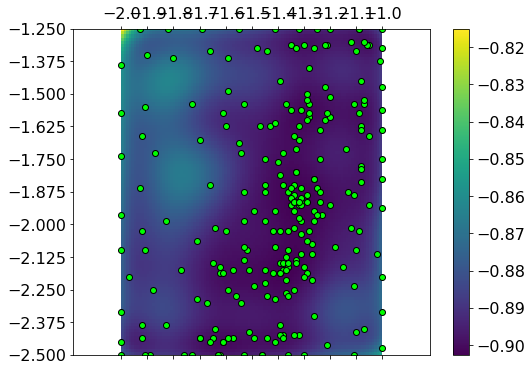

In [10]:
mYY   = np.reshape(yy, mɣ.shape)
_, ax = plt.subplots(figsize=(8, 6))

c = ax.matshow(mYY, extent=[vɣ.min(), vɣ.max(), vα.min(), vα.max()], origin='lower')
plt.scatter   (mXX[:,0], mXX[:,1], c='lime', edgecolor='k')
ax.set_xticks (vɣ[::10])
ax.set_yticks (vα[::10])
plt.colorbar  (c, ax=ax)
plt.axis      ('equal')
plt.show      ()

#### Best $\gamma$ and $\alpha$:

In [11]:
yIdx, xIdx = np.where(mYY == mYY.min())
ɣ,    α    = vɣ[xIdx], vα[yIdx]
ɣ,    α 

(array([-1.31]), array([-1.9125]))

In [12]:
-mYY.min()

0.9025888562536486

In [13]:
-CrossValScore(ɣ, α, kFold=N)

0.9025898077882599